In [1]:
# If you haven't installed tiingo,
###pip install tiingo
###pip install tiingo[pandas]

In [2]:
# Import Libraries and Dependencies 
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
import os
import json
from tiingo import TiingoClient
import seaborn as sb
import urllib.request
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

# Coronavirus Data Information

In [3]:
# Grab dataset from URL *multiple updates each day make sure we are on current tab....
cv_data = pd.read_html('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?usp=sharing&sle=true#')

In [4]:
# Combine all tabs from dataset
cv_data =pd.concat(cv_data)
cv_data

C:\Users\selva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


A              B  \
0                                        Announcement            NaN   
1   We created a GitHub repo: https://github.com/C...            NaN   
2          It has the same info as this Google Sheet.            NaN   
3   Due to the download limitation, we will soon s...            NaN   
4   Hope you will enjoy the new data storage place...            NaN   
..                                                ...            ...   
23                                       Heilongjiang          China   
24                                                NaN          Japan   
25                                                NaN       Thailand   
26                                                NaN    South Korea   
27                                         Washington  United States   

            C    D    E    F    G   H    I  Unnamed: 0  
0         NaN  NaN  NaN  NaN  NaN NaN  NaN           1  
1         NaN  NaN  NaN  NaN  NaN NaN  NaN           2  
2         NaN  NaN  NaN  NaN  NaN NaN  NaN           3  
3         NaN  NaN  NaN  NaN  NaN NaN  NaN           4  
4         NaN  NaN  NaN  NaN  NaN NaN  NaN           5  
..        ...  ...  ...  ...  ...  ..  ...         ...  
23  1/21/2020  NaN    1  NaN  NaN NaN  NaN          24  
24  1/21/2020    1  NaN  NaN  NaN NaN  NaN          25  
25  1/21/2020    2  NaN  NaN  NaN NaN  NaN          26  
26  1/21/2020    1  NaN  NaN  NaN NaN  NaN          27  
27  1/21/2020    1  NaN  NaN  NaN NaN  NaN          28  

[2425 rows x 10 columns]

In [5]:
# Remove Strings from 1st row
cv_data.drop([0], inplace=True)
cv_data

A               B  \
1   We created a GitHub repo: https://github.com/C...             NaN   
2          It has the same info as this Google Sheet.             NaN   
3   Due to the download limitation, we will soon s...             NaN   
4   Hope you will enjoy the new data storage place...             NaN   
1                                               Hubei  Mainland China   
..                                                ...             ...   
23                                       Heilongjiang           China   
24                                                NaN           Japan   
25                                                NaN        Thailand   
26                                                NaN     South Korea   
27                                         Washington   United States   

               C      D    E     F    G   H    I  Unnamed: 0  
1            NaN    NaN  NaN   NaN  NaN NaN  NaN           2  
2            NaN    NaN  NaN   NaN  NaN NaN  NaN           3  
3            NaN    NaN  NaN   NaN  NaN NaN  NaN           4  
4            NaN    NaN  NaN   NaN  NaN NaN  NaN           5  
1   2/9/20 23:33  29631  871  1795  NaN NaN  NaN           2  
..           ...    ...  ...   ...  ...  ..  ...         ...  
23     1/21/2020    NaN    1   NaN  NaN NaN  NaN          24  
24     1/21/2020      1  NaN   NaN  NaN NaN  NaN          25  
25     1/21/2020      2  NaN   NaN  NaN NaN  NaN          26  
26     1/21/2020      1  NaN   NaN  NaN NaN  NaN          27  
27     1/21/2020      1  NaN   NaN  NaN NaN  NaN          28  

[2383 rows x 10 columns]

In [6]:
###drop "Unnamed:0"
###cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=True)
###cv_data

# Rename columns in dataframe
cv_data = cv_data.rename(columns={
    'A':'Province/State',
    'B':'Country/Region',
    'C':'Last_Update',
    'D':'Infected',
    'E':'Deaths',
    'F':'Recovered',
    
})
cv_data.head()

Province/State  Country/Region  \
1  We created a GitHub repo: https://github.com/C...             NaN   
2         It has the same info as this Google Sheet.             NaN   
3  Due to the download limitation, we will soon s...             NaN   
4  Hope you will enjoy the new data storage place...             NaN   
1                                              Hubei  Mainland China   

    Last_Update Infected Deaths Recovered    G   H    I  Unnamed: 0  
1           NaN      NaN    NaN       NaN  NaN NaN  NaN           2  
2           NaN      NaN    NaN       NaN  NaN NaN  NaN           3  
3           NaN      NaN    NaN       NaN  NaN NaN  NaN           4  
4           NaN      NaN    NaN       NaN  NaN NaN  NaN           5  
1  2/9/20 23:33    29631    871      1795  NaN NaN  NaN           2

In [7]:
# Set index
cv_data =cv_data.set_index('Last_Update')
cv_data

Province/State  \
Last_Update                                                       
NaN           We created a GitHub repo: https://github.com/C...   
NaN                  It has the same info as this Google Sheet.   
NaN           Due to the download limitation, we will soon s...   
NaN           Hope you will enjoy the new data storage place...   
2/9/20 23:33                                              Hubei   
...                                                         ...   
1/21/2020                                          Heilongjiang   
1/21/2020                                                   NaN   
1/21/2020                                                   NaN   
1/21/2020                                                   NaN   
1/21/2020                                            Washington   

              Country/Region Infected Deaths Recovered    G   H    I  \
Last_Update                                                            
NaN                      NaN      NaN    NaN       NaN  NaN NaN  NaN   
NaN                      NaN      NaN    NaN       NaN  NaN NaN  NaN   
NaN                      NaN      NaN    NaN       NaN  NaN NaN  NaN   
NaN                      NaN      NaN    NaN       NaN  NaN NaN  NaN   
2/9/20 23:33  Mainland China    29631    871      1795  NaN NaN  NaN   
...                      ...      ...    ...       ...  ...  ..  ...   
1/21/2020              China      NaN      1       NaN  NaN NaN  NaN   
1/21/2020              Japan        1    NaN       NaN  NaN NaN  NaN   
1/21/2020           Thailand        2    NaN       NaN  NaN NaN  NaN   
1/21/2020        South Korea        1    NaN       NaN  NaN NaN  NaN   
1/21/2020      United States        1    NaN       NaN  NaN NaN  NaN   

              Unnamed: 0  
Last_Update               
NaN                    2  
NaN                    3  
NaN                    4  
NaN                    5  
2/9/20 23:33           2  
...                  ...  
1/21/2020             24  
1/21/2020             25  
1/21/2020             26  
1/21/2020             27  
1/21/2020             28  

[2383 rows x 9 columns]

In [8]:
# Drop "Unnamed:0"
cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=False)
cv_data.head()

Province/State  \
Last_Update                                                       
NaN           We created a GitHub repo: https://github.com/C...   
NaN                  It has the same info as this Google Sheet.   
NaN           Due to the download limitation, we will soon s...   
NaN           Hope you will enjoy the new data storage place...   
2/9/20 23:33                                              Hubei   

              Country/Region Infected Deaths Recovered  
Last_Update                                             
NaN                      NaN      NaN    NaN       NaN  
NaN                      NaN      NaN    NaN       NaN  
NaN                      NaN      NaN    NaN       NaN  
NaN                      NaN      NaN    NaN       NaN  
2/9/20 23:33  Mainland China    29631    871      1795

In [9]:
cv_data.isnull().sum()

Province/State    606
Country/Region      4
Infected           34
Deaths            941
Recovered         880
dtype: int64

In [10]:
cv_data.dropna(inplace=True)
cv_data

Province/State  Country/Region Infected Deaths Recovered
Last_Update                                                                
2/9/20 23:33                Hubei  Mainland China    29631    871      1795
2/10/20 3:43            Guangdong  Mainland China     1151      1       147
2/10/20 1:13             Zhejiang  Mainland China     1092      0       201
2/10/20 1:13                Henan  Mainland China     1073      6       169
2/10/20 2:13                Hunan  Mainland China      879      1       186
...                           ...             ...      ...    ...       ...
1/25/2020 12:00 PM       Shanghai  Mainland China       40     72         1
1/25/2020 12:00 PM       Shanghai  Mainland China       33     72         1
1/25/2020 12:00 AM       Shanghai  Mainland China       33     22         1
1/24/2020 12:00 PM       Shanghai  Mainland China       20     22         1
1/23/20 12:00 PM        Guangdong  Mainland China       32      1         2

[951 rows x 5 columns]

In [11]:
cv_data.dtypes

Province/State    object
Country/Region    object
Infected          object
Deaths            object
Recovered         object
dtype: object

In [12]:
# Change types from object to int.
###people_df['Person_ID'] = people_df['Person_ID'].astype('int')
cv_data['Infected'] = cv_data['Infected'].astype('int')
cv_data['Deaths'] = cv_data['Deaths'].astype('int')
cv_data['Recovered'] = cv_data['Recovered'].astype('int')

cv_data.dtypes

Province/State    object
Country/Region    object
Infected           int32
Deaths             int32
Recovered          int32
dtype: object

In [13]:
cv_data[['Province/State']].duplicated()

Last_Update
2/9/20 23:33          False
2/10/20 3:43          False
2/10/20 1:13          False
2/10/20 1:13          False
2/10/20 2:13          False
                      ...  
1/25/2020 12:00 PM     True
1/25/2020 12:00 PM     True
1/25/2020 12:00 AM     True
1/24/2020 12:00 PM     True
1/23/20 12:00 PM       True
Length: 951, dtype: bool

In [14]:
# Add totals of columns together for their individual daily total to be added to df daily 
# Replace index with date use current 
cv_data_2 = cv_data.reset_index()
cv_data_2.head()

Last_Update Province/State  Country/Region  Infected  Deaths  Recovered
0  2/9/20 23:33          Hubei  Mainland China     29631     871       1795
1  2/10/20 3:43      Guangdong  Mainland China      1151       1        147
2  2/10/20 1:13       Zhejiang  Mainland China      1092       0        201
3  2/10/20 1:13          Henan  Mainland China      1073       6        169
4  2/10/20 2:13          Hunan  Mainland China       879       1        186

In [15]:
# Add new date column to get rid of time stamp
cv_data_2['Last_Update']= pd.to_datetime(cv_data_2.Last_Update)
cv_data_2['Date']= cv_data_2['Last_Update'].dt.strftime('%m/%d/%Y')
cv_data_2.head()

Last_Update Province/State  Country/Region  Infected  Deaths  \
0 2020-02-09 23:33:00          Hubei  Mainland China     29631     871   
1 2020-02-10 03:43:00      Guangdong  Mainland China      1151       1   
2 2020-02-10 01:13:00       Zhejiang  Mainland China      1092       0   
3 2020-02-10 01:13:00          Henan  Mainland China      1073       6   
4 2020-02-10 02:13:00          Hunan  Mainland China       879       1   

   Recovered        Date  
0       1795  02/09/2020  
1        147  02/10/2020  
2        201  02/10/2020  
3        169  02/10/2020  
4        186  02/10/2020

In [16]:
# Set index as 'Date'
cv_data_2.set_index('Date')

Last_Update Province/State  Country/Region  Infected  \
Date                                                                      
02/09/2020 2020-02-09 23:33:00          Hubei  Mainland China     29631   
02/10/2020 2020-02-10 03:43:00      Guangdong  Mainland China      1151   
02/10/2020 2020-02-10 01:13:00       Zhejiang  Mainland China      1092   
02/10/2020 2020-02-10 01:13:00          Henan  Mainland China      1073   
02/10/2020 2020-02-10 02:13:00          Hunan  Mainland China       879   
...                        ...            ...             ...       ...   
01/25/2020 2020-01-25 12:00:00       Shanghai  Mainland China        40   
01/25/2020 2020-01-25 12:00:00       Shanghai  Mainland China        33   
01/25/2020 2020-01-25 00:00:00       Shanghai  Mainland China        33   
01/24/2020 2020-01-24 12:00:00       Shanghai  Mainland China        20   
01/23/2020 2020-01-23 12:00:00      Guangdong  Mainland China        32   

            Deaths  Recovered  
Date                           
02/09/2020     871       1795  
02/10/2020       1        147  
02/10/2020       0        201  
02/10/2020       6        169  
02/10/2020       1        186  
...            ...        ...  
01/25/2020      72          1  
01/25/2020      72          1  
01/25/2020      22          1  
01/24/2020      22          1  
01/23/2020       1          2  

[951 rows x 6 columns]

In [17]:
# Drop Last Update column
cv_data_2 = cv_data_2.drop(columns=['Last_Update'])
cv_data_2.head()

Province/State  Country/Region  Infected  Deaths  Recovered        Date
0          Hubei  Mainland China     29631     871       1795  02/09/2020
1      Guangdong  Mainland China      1151       1        147  02/10/2020
2       Zhejiang  Mainland China      1092       0        201  02/10/2020
3          Henan  Mainland China      1073       6        169  02/10/2020
4          Hunan  Mainland China       879       1        186  02/10/2020

In [18]:
# Drop duplicates in order to get the last value for the day
cv_data_2.drop_duplicates(subset=['Province/State', "Date"], inplace=True)

### China vs Coronavirus

In [19]:
# Create new data frame extracting only mainland China info
cv_data_china = cv_data_2.loc[cv_data_2['Country/Region']=='Mainland China']
cv_data_china.head()

Province/State  Country/Region  Infected  Deaths  Recovered        Date
0          Hubei  Mainland China     29631     871       1795  02/09/2020
1      Guangdong  Mainland China      1151       1        147  02/10/2020
2       Zhejiang  Mainland China      1092       0        201  02/10/2020
3          Henan  Mainland China      1073       6        169  02/10/2020
4          Hunan  Mainland China       879       1        186  02/10/2020

In [20]:
# Group by 'Date' in order to sum all
all_sum_china_cv = cv_data_china.groupby('Date').sum()
all_sum_china_cv

Infected  Deaths  Recovered
Date                                   
01/23/2020        32       1          2
01/24/2020        20      22          1
01/25/2020        40      72          1
01/26/2020      1476      77         45
01/27/2020      2860     102         52
01/28/2020      3931     129         89
01/29/2020      5261     168        103
01/30/2020      6634     210        135
01/31/2020      6691     210        162
02/01/2020     15899     360        404
02/02/2020     16642     361        463
02/03/2020     17347     361        528
02/04/2020     23657     490        843
02/05/2020     24370     492       1019
02/06/2020     30490     632       1470
02/07/2020     31196     636       1747
02/08/2020     34612     723       2371
02/09/2020     39770     904       3215
02/10/2020      9592      33       1366

In [21]:
all_sum_china_cv.reset_index(inplace=True)
all_sum_china_cv['Date'] = pd.to_datetime(all_sum_china_cv['Date'])
all_sum_china_cv.set_index('Date', inplace=True)

In [22]:
# Find ratio of deaths and recovery to confirmed effected
all_sum_china_cv['Death Ratio']= all_sum_china_cv['Deaths']/ all_sum_china_cv['Infected']
all_sum_china_cv['Recovered Ratio'] = all_sum_china_cv['Recovered']/ all_sum_china_cv['Infected']
all_sum_china_cv.head()

Infected  Deaths  Recovered  Death Ratio  Recovered Ratio
Date                                                                 
2020-01-23        32       1          2     0.031250         0.062500
2020-01-24        20      22          1     1.100000         0.050000
2020-01-25        40      72          1     1.800000         0.025000
2020-01-26      1476      77         45     0.052168         0.030488
2020-01-27      2860     102         52     0.035664         0.018182

In [23]:
# Round decimals
decimals = pd.Series ([3,3], index=['Death Ratio', 'Recovered Ratio'])
all_sum_china_cv = all_sum_china_cv.round(decimals)
all_sum_china_cv.head()

Infected  Deaths  Recovered  Death Ratio  Recovered Ratio
Date                                                                 
2020-01-23        32       1          2        0.031            0.062
2020-01-24        20      22          1        1.100            0.050
2020-01-25        40      72          1        1.800            0.025
2020-01-26      1476      77         45        0.052            0.030
2020-01-27      2860     102         52        0.036            0.018

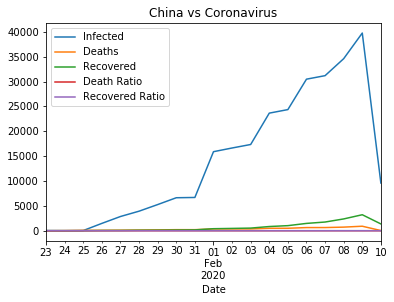

In [24]:
# Plot China vs Coronavirus
all_sum_china_cv.plot(title='China vs Coronavirus')

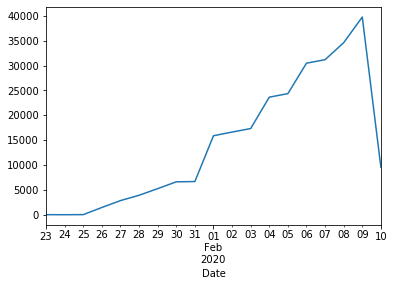

In [25]:
# Compiling all Plots
infected = all_sum_china_cv['Infected']
deaths = all_sum_china_cv['Deaths']
recovered = all_sum_china_cv['Recovered']
death_ratio = all_sum_china_cv['Death Ratio']
recovered_ratio = all_sum_china_cv['Recovered Ratio']

infected.plot()

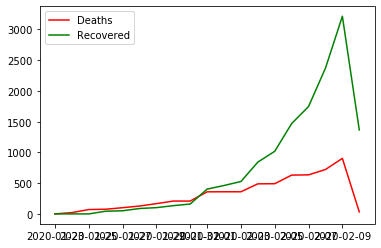

In [26]:
fig, deaths_recovered = plt.subplots()
deaths_recovered.plot(deaths, '-r', label='Deaths')
deaths_recovered.plot(recovered, '-g', label='Recovered')
deaths_recovered.axis()
deaths_recovered_plot = deaths_recovered.legend()

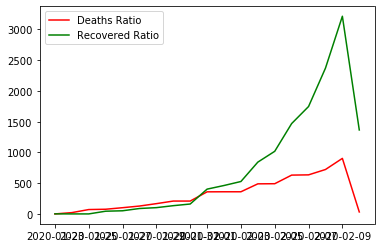

In [27]:
fig, deaths_recovered_ratio = plt.subplots()
deaths_recovered_ratio.plot(deaths, '-r', label='Deaths Ratio')
deaths_recovered_ratio.plot(recovered, '-g', label='Recovered Ratio')
deaths_recovered_ratio.axis()
deaths_recovered_ratio_plot = deaths_recovered_ratio.legend()

In [28]:
###pip install pandas-montecarlo
import pandas_montecarlo

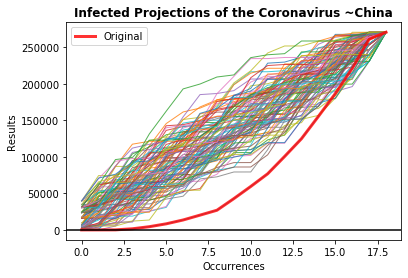

In [29]:
mc = all_sum_china_cv['Infected'].montecarlo(sims=100, bust=-0.1, goal=1)
mc.plot(title='Infected Projections of the Coronavirus ~China')

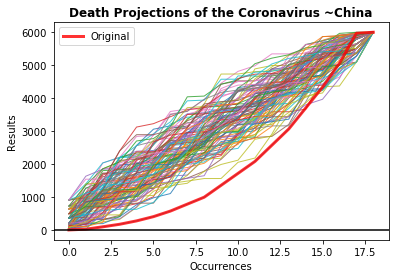

In [30]:
mc_deaths = all_sum_china_cv['Deaths'].montecarlo(sims=100, bust=-0.1, goal=1)
mc_deaths.plot(title='Death Projections of the Coronavirus ~China')

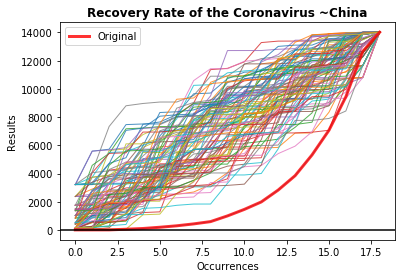

In [31]:
mc_recovery = all_sum_china_cv['Recovered'].montecarlo(sims=100, bust=-0.1, goal=1)
mc_recovery.plot(title='Recovery Rate of the Coronavirus ~China')

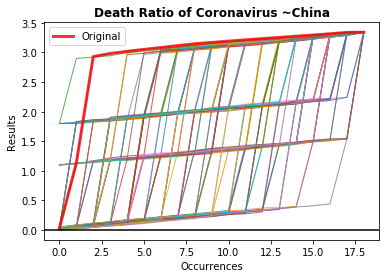

In [32]:
mc_death_ratio = all_sum_china_cv['Death Ratio'].montecarlo(sims=100, bust=-0.1, goal=1)
mc_death_ratio.plot(title="Death Ratio of Coronavirus ~China")

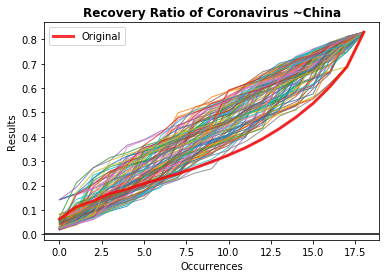

In [33]:
mc_recovery_ratio = all_sum_china_cv['Recovered Ratio'].montecarlo(sims=100, bust=0, goal=1)
mc_recovery_ratio.plot (title= 'Recovery Ratio of Coronavirus ~China')

### US vs Coronavirus

In [34]:
# Create new data frame extracting only US info
cv_data_us = cv_data_2.loc[cv_data_2['Country/Region']=='US']
cv_data_us

Province/State Country/Region  Infected  Deaths  Recovered        Date
40       Chicago, IL             US         2       0          2  02/09/2020
41    San Benito, CA             US         2       0          0  02/03/2020
42   Santa Clara, CA             US         2       0          0  02/03/2020
45        Boston, MA             US         1       0          0  02/01/2020
46   Los Angeles, CA             US         1       0          0  02/01/2020
47       Madison, WI             US         1       0          0  02/05/2020
48        Orange, CA             US         1       0          0  02/01/2020
49       Seattle, WA             US         1       0          1  02/09/2020
50         Tempe, AZ             US         1       0          0  02/01/2020
91       Chicago, IL             US         2       0          0  02/01/2020
151      Seattle, WA             US         1       0          0  02/01/2020
739  Santa Clara, CA             US         1       0          0  02/01/2020

In [35]:
# Group by 'Date' in order to sum all
all_sum_us_cv = cv_data_us.groupby('Date').sum()
all_sum_us_cv

Infected  Deaths  Recovered
Date                                   
02/01/2020         8       0          0
02/03/2020         4       0          0
02/05/2020         1       0          0
02/09/2020         3       0          3

In [36]:
# Find ratio of deaths and recovery to confirmed effected
all_sum_us_cv['Death Ratio']= all_sum_us_cv['Deaths']/ all_sum_us_cv['Infected']
all_sum_us_cv['Recovered Ratio'] = all_sum_us_cv['Recovered']/ all_sum_us_cv['Infected']
all_sum_us_cv.head()

Infected  Deaths  Recovered  Death Ratio  Recovered Ratio
Date                                                                 
02/01/2020         8       0          0          0.0              0.0
02/03/2020         4       0          0          0.0              0.0
02/05/2020         1       0          0          0.0              0.0
02/09/2020         3       0          3          0.0              1.0

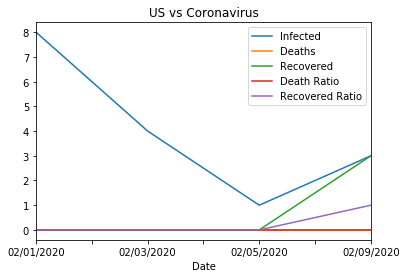

In [37]:
# Plot US vs Coronavirus
all_sum_us_cv.plot(title='US vs Coronavirus')

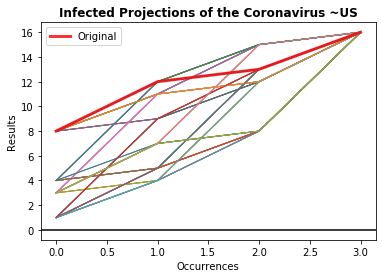

In [38]:
mc = all_sum_us_cv['Infected'].montecarlo(sims=100, bust=-0.1, goal=1)
mc.plot(title='Infected Projections of the Coronavirus ~US')

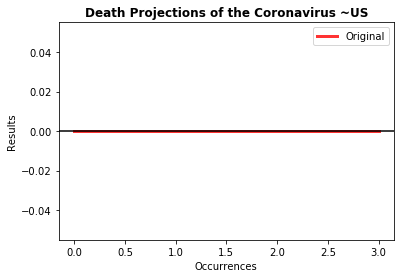

In [39]:
mc_deaths = all_sum_us_cv['Deaths'].montecarlo(sims=100, bust=-0.1, goal=1)
mc_deaths.plot(title='Death Projections of the Coronavirus ~US')

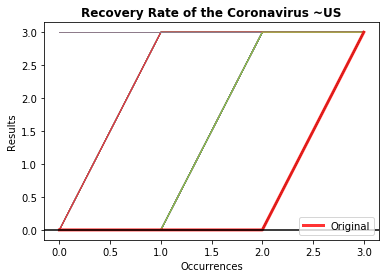

In [40]:
mc_recovery = all_sum_us_cv['Recovered'].montecarlo(sims=100, bust=-0.1, goal=1)
mc_recovery.plot(title='Recovery Rate of the Coronavirus ~US')

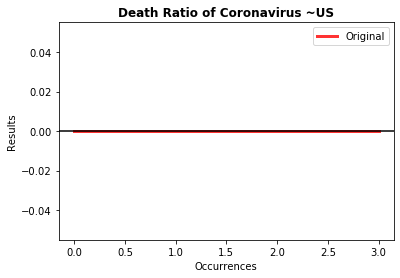

In [41]:
mc_death_ratio = all_sum_us_cv['Death Ratio'].montecarlo(sims=100, bust=-0.1, goal=1)
mc_death_ratio.plot(title="Death Ratio of Coronavirus ~US")

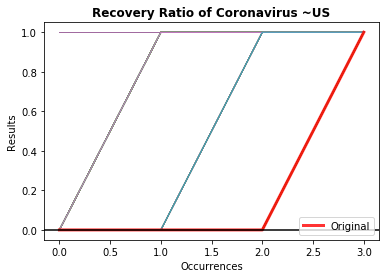

In [42]:
mc_recovery_ratio = all_sum_us_cv['Recovered Ratio'].montecarlo(sims=100, bust=0, goal=1)
mc_recovery_ratio.plot (title= 'Recovery Ratio of Coronavirus ~US')

# China and US Stock Information

In [43]:
# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

In [44]:
# Create a Client to Connect to Tiingo
client = TiingoClient()

In [45]:
# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-252)

### China Stock DataFrame

In [46]:
# Create DataFrames for China
china_ticker_df = client.get_dataframe(['ASHR','CQQQ', 'CHIE', 'CHIM', 'KURE', 'CHIS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
china_df = china_ticker_df.rename(columns={'ASHR':'ASHR (China SH Composite)','CQQQ':'CQQQ (China Technology)', 'CHIE':'CHIE (China Energy)', 'CHIM':'CHIM (China Materials)', 'KURE':'KURE (China Healthcare)', 'CHIS':'CHIS (China Consumer Staples)'})
china_df.head()

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


ASHR (China SH Composite)  CQQQ (China Technology)  \
date                                                                            
2019-06-04 00:00:00+00:00                      26.36                    42.41   
2019-06-05 00:00:00+00:00                      26.06                    42.16   
2019-06-06 00:00:00+00:00                      26.08                    42.06   
2019-06-07 00:00:00+00:00                      26.22                    42.87   
2019-06-10 00:00:00+00:00                      26.30                    43.95   

                           CHIE (China Energy)  CHIM (China Materials)  \
date                                                                     
2019-06-04 00:00:00+00:00              10.9250                   14.99   
2019-06-05 00:00:00+00:00              10.8600                   14.94   
2019-06-06 00:00:00+00:00              10.7600                   14.84   
2019-06-07 00:00:00+00:00              10.8950                   14.97   
2019-06-10 00:00:00+00:00              10.9391                   15.04   

                           KURE (China Healthcare)  \
date                                                 
2019-06-04 00:00:00+00:00                    19.50   
2019-06-05 00:00:00+00:00                    18.81   
2019-06-06 00:00:00+00:00                    18.68   
2019-06-07 00:00:00+00:00                    18.86   
2019-06-10 00:00:00+00:00                    18.65   

                           CHIS (China Consumer Staples)  
date                                                      
2019-06-04 00:00:00+00:00                        19.1247  
2019-06-05 00:00:00+00:00                        18.9860  
2019-06-06 00:00:00+00:00                        18.7885  
2019-06-07 00:00:00+00:00                        18.9300  
2019-06-10 00:00:00+00:00                        19.2550

In [47]:
# Count/Drop Nulls (if any)
china_df.isnull().sum()

#china_df.dropna(inplace=True)
#china_df.isnull().sum()

ASHR (China SH Composite)        0
CQQQ (China Technology)          0
CHIE (China Energy)              0
CHIM (China Materials)           0
KURE (China Healthcare)          0
CHIS (China Consumer Staples)    0
dtype: int64

In [48]:
# Calculate the Daily Returns for China Stocks
china_daily_returns = china_df.pct_change()
china_daily_returns.head()

ASHR (China SH Composite)  CQQQ (China Technology)  \
date                                                                            
2019-06-04 00:00:00+00:00                        NaN                      NaN   
2019-06-05 00:00:00+00:00                  -0.011381                -0.005895   
2019-06-06 00:00:00+00:00                   0.000767                -0.002372   
2019-06-07 00:00:00+00:00                   0.005368                 0.019258   
2019-06-10 00:00:00+00:00                   0.003051                 0.025192   

                           CHIE (China Energy)  CHIM (China Materials)  \
date                                                                     
2019-06-04 00:00:00+00:00                  NaN                     NaN   
2019-06-05 00:00:00+00:00            -0.005950               -0.003336   
2019-06-06 00:00:00+00:00            -0.009208               -0.006693   
2019-06-07 00:00:00+00:00             0.012546                0.008760   
2019-06-10 00:00:00+00:00             0.004048                0.004676   

                           KURE (China Healthcare)  \
date                                                 
2019-06-04 00:00:00+00:00                      NaN   
2019-06-05 00:00:00+00:00                -0.035385   
2019-06-06 00:00:00+00:00                -0.006911   
2019-06-07 00:00:00+00:00                 0.009636   
2019-06-10 00:00:00+00:00                -0.011135   

                           CHIS (China Consumer Staples)  
date                                                      
2019-06-04 00:00:00+00:00                            NaN  
2019-06-05 00:00:00+00:00                      -0.007252  
2019-06-06 00:00:00+00:00                      -0.010402  
2019-06-07 00:00:00+00:00                       0.007531  
2019-06-10 00:00:00+00:00                       0.017169

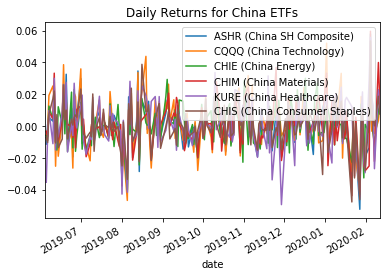

In [49]:
# Plot Daily Returns for China
china_daily_returns.plot(title="Daily Returns for China ETFs")

In [50]:
# Calculate the Standard Deviation for China
china_std = china_daily_returns.std()
china_std

ASHR (China SH Composite)        0.013541
CQQQ (China Technology)          0.015490
CHIE (China Energy)              0.012529
CHIM (China Materials)           0.014171
KURE (China Healthcare)          0.015497
CHIS (China Consumer Staples)    0.012878
dtype: float64

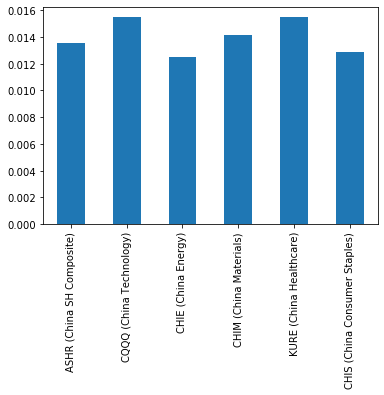

In [51]:
# Plot Standard Deviation for China
china_std.plot.bar()

### US Stock Information 

In [52]:
# Create DataFrames for US
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
us_df = us_ticker_df.rename(columns={'SPY':'SPY (USA SP500 Composite)', 'IGM':'IGM (USA Technology)', 'IYE':'IYE (USA Energy)', 'IYM':'IYM (USA Materials)', 'IYH':'IYH (USA Healthcare)', 'IECS':'IECS (USA Consumer Staples)'})
us_df.head()

C:\Users\selva\Anaconda3\lib\site-packages\tiingo\api.py:270: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prices = pd.concat([prices, df[stock]], axis=1)


SPY (USA SP500 Composite)  IGM (USA Technology)  \
date                                                                         
2019-06-04 00:00:00+00:00                     280.53                201.65   
2019-06-05 00:00:00+00:00                     282.96                203.62   
2019-06-06 00:00:00+00:00                     284.80                205.20   
2019-06-07 00:00:00+00:00                     287.65                209.36   
2019-06-10 00:00:00+00:00                     288.97                211.66   

                           IYE (USA Energy)  IYM (USA Materials)  \
date                                                               
2019-06-04 00:00:00+00:00             32.88                90.33   
2019-06-05 00:00:00+00:00             32.47                90.72   
2019-06-06 00:00:00+00:00             32.99                91.53   
2019-06-07 00:00:00+00:00             33.12                92.13   
2019-06-10 00:00:00+00:00             33.20                92.42   

                           IYH (USA Healthcare)  IECS (USA Consumer Staples)  
date                                                                          
2019-06-04 00:00:00+00:00                187.11                      26.3061  
2019-06-05 00:00:00+00:00                188.38                      26.6179  
2019-06-06 00:00:00+00:00                188.72                      26.8719  
2019-06-07 00:00:00+00:00                191.03                      27.1349  
2019-06-10 00:00:00+00:00                191.77                      27.0693

In [53]:
# Count/Drop Nulls (if any)
us_df.isnull().sum()

SPY (USA SP500 Composite)      0
IGM (USA Technology)           0
IYE (USA Energy)               0
IYM (USA Materials)            0
IYH (USA Healthcare)           0
IECS (USA Consumer Staples)    0
dtype: int64

In [54]:
us_df.dropna(inplace=True)
us_df.isnull().sum()

SPY (USA SP500 Composite)      0
IGM (USA Technology)           0
IYE (USA Energy)               0
IYM (USA Materials)            0
IYH (USA Healthcare)           0
IECS (USA Consumer Staples)    0
dtype: int64

In [55]:
# Calculate the Daily Returns for US Stocks
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

SPY (USA SP500 Composite)  IGM (USA Technology)  \
date                                                                         
2019-06-04 00:00:00+00:00                        NaN                   NaN   
2019-06-05 00:00:00+00:00                   0.008662              0.009769   
2019-06-06 00:00:00+00:00                   0.006503              0.007760   
2019-06-07 00:00:00+00:00                   0.010007              0.020273   
2019-06-10 00:00:00+00:00                   0.004589              0.010986   

                           IYE (USA Energy)  IYM (USA Materials)  \
date                                                               
2019-06-04 00:00:00+00:00               NaN                  NaN   
2019-06-05 00:00:00+00:00         -0.012470             0.004318   
2019-06-06 00:00:00+00:00          0.016015             0.008929   
2019-06-07 00:00:00+00:00          0.003941             0.006555   
2019-06-10 00:00:00+00:00          0.002415             0.003148   

                           IYH (USA Healthcare)  IECS (USA Consumer Staples)  
date                                                                          
2019-06-04 00:00:00+00:00                   NaN                          NaN  
2019-06-05 00:00:00+00:00              0.006787                     0.011853  
2019-06-06 00:00:00+00:00              0.001805                     0.009542  
2019-06-07 00:00:00+00:00              0.012240                     0.009787  
2019-06-10 00:00:00+00:00              0.003874                    -0.002418

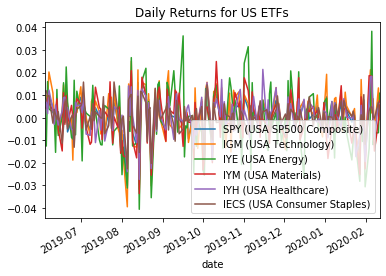

In [56]:
# Plot Daily Returns for US
us_daily_returns.plot(title="Daily Returns for US ETFs")

In [57]:
# Calculate Standard Deviation for US
us_std = us_daily_returns.std()
us_std

SPY (USA SP500 Composite)      0.007630
IGM (USA Technology)           0.010196
IYE (USA Energy)               0.013055
IYM (USA Materials)            0.009679
IYH (USA Healthcare)           0.007889
IECS (USA Consumer Staples)    0.006394
dtype: float64

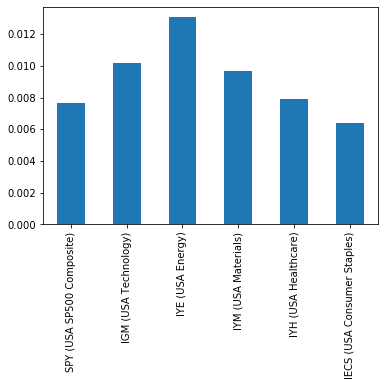

In [58]:
# Plot Standard Deviation for US
us_std.plot.bar()

# Monte Carlo Simulations ~1 year

### China Monte Carlo Simulation

In [59]:
# Calculate the Value of Average Daily Returns
##avg_daily_returns_ashr = china_daily_returns.mean()['ASHR (China SH Composite)']
avg_daily_returns_cqqq = china_daily_returns.mean()['CQQQ (China Technology)']
avg_daily_returns_chie = china_daily_returns.mean()['CHIE (China Energy)']
avg_daily_returns_chim = china_daily_returns.mean()['CHIM (China Materials)']
avg_daily_returns_kure = china_daily_returns.mean()['KURE (China Healthcare)']
avg_daily_returns_chis = china_daily_returns.mean()['CHIS (China Consumer Staples)']

# Calculate the Standard Deviation 
##std_daily_returns_ashr = china_daily_returns.std()['ASHR China SH Composite']
std_daily_returns_cqqq = china_daily_returns.std()['CQQQ (China Technology)']
std_daily_returns_chie = china_daily_returns.std()['CHIE (China Energy)']
std_daily_returns_chim = china_daily_returns.std()['CHIM (China Materials)']
std_daily_returns_kure = china_daily_returns.std()['KURE (China Healthcare)']
std_daily_returns_chis = china_daily_returns.std()['CHIS (China Consumer Staples)']

# Save the Last Day's Closing Price
##ashr_last_price = china_df['ASHR China SH Composite'][-1]
cqqq_last_price = china_df['CQQQ (China Technology)'][-1]
chie_last_price = china_df['CHIE (China Energy)'][-1]
chim_last_price = china_df['CHIM (China Materials)'][-1]
kure_last_price = china_df['KURE (China Healthcare)'][-1]
chis_last_price = china_df['CHIS (China Consumer Staples)'][-1]

In [60]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [61]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    ##simulated_ashr_prices = [ashr_last_price]
    simulated_cqqq_prices = [cqqq_last_price]
    simulated_chie_prices = [chie_last_price]
    simulated_chim_prices = [chim_last_price]
    simulated_kure_prices = [kure_last_price]
    simulated_chis_prices = [chis_last_price]
    
    for y in range (number_records):
        ##simulated_ashr_price = simulated_ashr_prices[-1] * (1 + np.random.normal(avg_daily_returns_ashr, std_daily_returns_ashr))
        simulated_cqqq_price = simulated_cqqq_prices[-1] * (1 + np.random.normal(avg_daily_returns_cqqq, std_daily_returns_cqqq))
        simulated_chie_price = simulated_chie_prices[-1] * (1 + np.random.normal(avg_daily_returns_chie, std_daily_returns_chie))
        simulated_chim_price = simulated_chim_prices[-1] * (1 + np.random.normal(avg_daily_returns_chim, std_daily_returns_chim))
        simulated_kure_price = simulated_kure_prices[-1] * (1 + np.random.normal(avg_daily_returns_kure, std_daily_returns_kure))
        simulated_chis_price = simulated_chis_prices[-1] * (1 + np.random.normal(avg_daily_returns_chis, std_daily_returns_chis))
       
        ##simulated_ashr_prices.append(simulated_ashr_price)
        simulated_cqqq_prices.append(simulated_cqqq_price)
        simulated_chie_prices.append(simulated_chie_price)
        simulated_chim_prices.append(simulated_chim_price)
        simulated_kure_prices.append(simulated_kure_price)
        simulated_chis_prices.append(simulated_chis_price)
    
    ##monte_carlo['ASHR China SH Composite prices'] = pd.Series(simulated_ashr_prices)
    monte_carlo['CQQQ (China Technology) prices'] = pd.Series(simulated_cqqq_prices)
    monte_carlo['CHIE (China Energy) prices'] = pd.Series(simulated_chie_prices)
    monte_carlo['CHIM (China Materials) prices'] = pd.Series(simulated_chim_prices)
    monte_carlo['KURE (China Healthcare) prices'] = pd.Series(simulated_kure_prices)
    monte_carlo['CHIS (China Consumer Staples) prices'] = pd.Series(simulated_chis_prices)
    
    simulated_china_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    china_portfolio_daily_returns = simulated_china_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + china_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

0         1         2         3         4         5         6    \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1 -0.006146  0.001380  0.002222 -0.004807 -0.006163  0.006102  0.005613   
2 -0.008679 -0.010603  0.004875 -0.004739 -0.012326  0.020837  0.016047   
3 -0.004749 -0.011152 -0.002833  0.001494 -0.002996  0.012888 -0.000489   
4 -0.012397 -0.007926 -0.001612  0.008061  0.001527  0.006821 -0.008946   

        7         8         9    ...       490       491       492       493  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.012248 -0.005863  0.011145  ...  0.005193 -0.007410  0.011426 -0.005459   
2  0.014980 -0.011819  0.017247  ...  0.003554 -0.005826  0.016635 -0.005268   
3  0.016193 -0.004609  0.014647  ...  0.011852  0.000036  0.022563 -0.000918   
4  0.011537  0.007028  0.005246  ... -0.000096 -0.004627  0.028923  0.005645   

        494       495       496       497       498       499  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1 -0.000708 -0.000688  0.009834  0.002464 -0.002170  0.000644  
2  0.010472  0.004809  0.019953  0.002971 -0.005568  0.002204  
3  0.018662  0.014671  0.017267  0.008907 -0.010363 -0.008414  
4  0.007205  0.008654  0.011279  0.008832 -0.002099 -0.015322  

[5 rows x 500 columns]

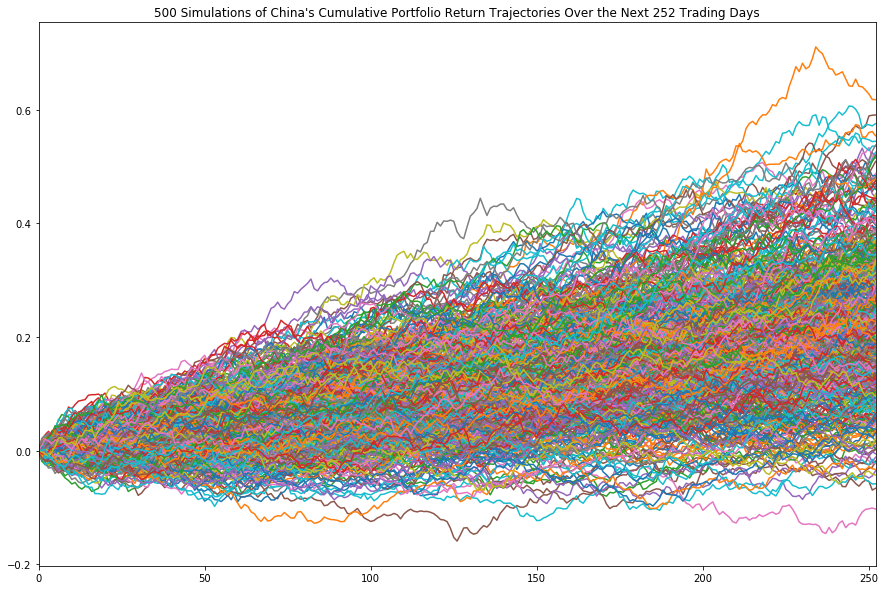

In [62]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of China's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))

### US Monte Carlo Simulation 

In [63]:
# Calculate the Value of Average Daily Returns
#avg_daily_returns_spy = us_daily_returns.mean()['SPY (USA SP500 Composite)']
avg_daily_returns_igm = us_daily_returns.mean()['IGM (USA Technology)']
avg_daily_returns_iye = us_daily_returns.mean()['IYE (USA Energy)']
avg_daily_returns_iym = us_daily_returns.mean()['IYM (USA Materials)']
avg_daily_returns_iyh = us_daily_returns.mean()['IYH (USA Healthcare)']
avg_daily_returns_iecs = us_daily_returns.mean()['IECS (USA Consumer Staples)']

# Calculate the Standard Deviation 
#std_daily_returns_spy = us_daily_returns.std()['SPY (USA SP500 Composite)']
std_daily_returns_igm = us_daily_returns.std()['IGM (USA Technology)']
std_daily_returns_iye = us_daily_returns.std()['IYE (USA Energy)']
std_daily_returns_iym = us_daily_returns.std()['IYM (USA Materials)']
std_daily_returns_iyh = us_daily_returns.std()['IYH (USA Healthcare)']
std_daily_returns_iecs = us_daily_returns.std()['IECS (USA Consumer Staples)']

# Save the Last Day's Closing Price
#spy_last_price = us_df['SPY (USA SP500 Composite)'][-1]
igm_last_price = us_df['IGM (USA Technology)'][-1]
iye_last_price = us_df['IYE (USA Energy)'][-1]
iym_last_price = us_df['IYM (USA Materials)'][-1]
iyh_last_price = us_df['IYH (USA Healthcare)'][-1]
iecs_last_price = us_df['IECS (USA Consumer Staples)'][-1]

In [64]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [65]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    #simulated_spy_prices = [spy_last_price]
    simulated_igm_prices = [igm_last_price]
    simulated_iye_prices = [iye_last_price]
    simulated_iym_prices = [iym_last_price]
    simulated_iyh_prices = [iyh_last_price]
    simulated_iecs_prices = [iecs_last_price]
    
    for y in range (number_records):
        #simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_igm_price = simulated_igm_prices[-1] * (1 + np.random.normal(avg_daily_returns_igm, std_daily_returns_igm))
        simulated_iye_price = simulated_iye_prices[-1] * (1 + np.random.normal(avg_daily_returns_iye, std_daily_returns_iye))
        simulated_iym_price = simulated_iym_prices[-1] * (1 + np.random.normal(avg_daily_returns_iym, std_daily_returns_iym))
        simulated_iyh_price = simulated_iyh_prices[-1] * (1 + np.random.normal(avg_daily_returns_iyh, std_daily_returns_iyh))
        simulated_iecs_price = simulated_iecs_prices[-1] * (1 + np.random.normal(avg_daily_returns_iecs, std_daily_returns_iecs))
       
        #simulated_spy_prices.append(simulated_spy_price)
        simulated_igm_prices.append(simulated_igm_price)
        simulated_iye_prices.append(simulated_iye_price)
        simulated_iym_prices.append(simulated_iym_price)
        simulated_iyh_prices.append(simulated_iyh_price)
        simulated_iecs_prices.append(simulated_iecs_price)
    
    #monte_carlo['SPY (USA SP500 Composite) prices'] = pd.Series(simulated_spy_prices)
    monte_carlo['IGM (USA Technology) prices'] = pd.Series(simulated_igm_prices)
    monte_carlo['IYE (USA Energy) prices'] = pd.Series(simulated_iye_prices)
    monte_carlo['IYM (USA Materials) prices'] = pd.Series(simulated_iym_prices)
    monte_carlo['IYH (USA Healthcare) prices'] = pd.Series(simulated_iyh_prices)
    monte_carlo['IECS (USA Consumer Staples) prices'] = pd.Series(simulated_iecs_prices)
    
    simulated_us_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    us_portfolio_daily_returns = simulated_us_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + us_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

0         1         2         3         4         5         6    \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000191 -0.002958  0.003740  0.001603  0.005799  0.001077  0.000664   
2  0.005272 -0.009145 -0.003579  0.000847  0.011147 -0.001732  0.001044   
3  0.000966 -0.005774 -0.000324  0.006745  0.021038  0.002903  0.009189   
4 -0.002421 -0.006057  0.001517  0.004094  0.020526  0.001762  0.006347   

        7         8         9    ...       490       491       492       493  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.001669 -0.004524 -0.001920  ... -0.006253  0.002606  0.001432 -0.000445   
2  0.008570 -0.007383 -0.002657  ... -0.004731  0.007820  0.004227 -0.004277   
3  0.008606 -0.011938 -0.005134  ...  0.000176  0.010214  0.001641  0.000238   
4  0.017159 -0.010417  0.001217  ...  0.001738  0.015804  0.007882 -0.010006   

        494       495       496       497       498       499  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.005892  0.005457  0.003056  0.002089  0.011246 -0.001917  
2 -0.000213  0.009723 -0.001088  0.006781  0.010151  0.003873  
3  0.003526  0.006764 -0.002956  0.006234  0.015147  0.006137  
4  0.008204  0.012660 -0.001913 -0.000792  0.010979  0.007058  

[5 rows x 500 columns]

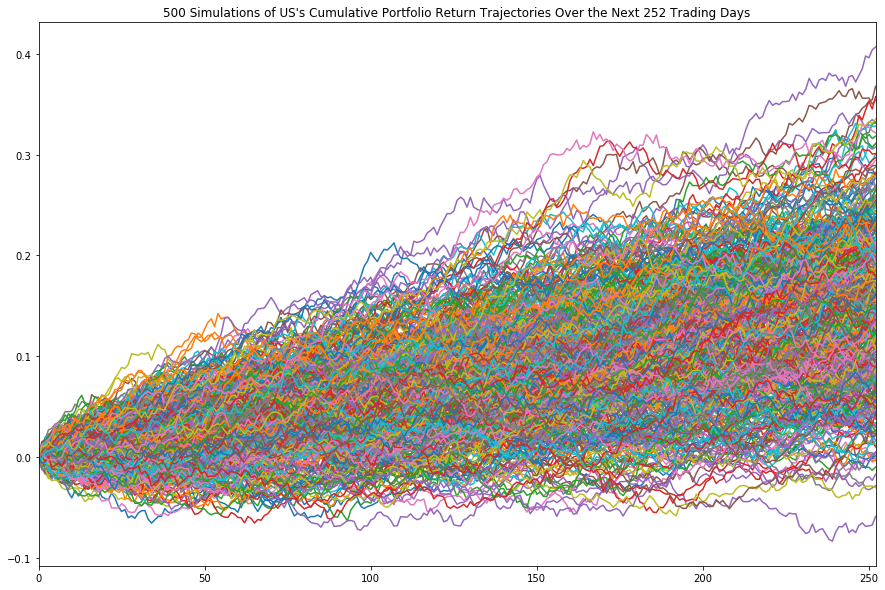

In [66]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of US's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))

# Correlation Studies

In [67]:
# Only need to run this once to normalize
all_sum_china_cv.index = all_sum_china_cv.index.tz_localize('UTC')

In [68]:
#pip install --user --upgrade matplotlib

### China vs Coronavirus

In [69]:
china_cv_raw_df = pd.concat([china_df, all_sum_china_cv], axis=1, sort=True)
china_cv_raw_df.dropna(inplace=True)

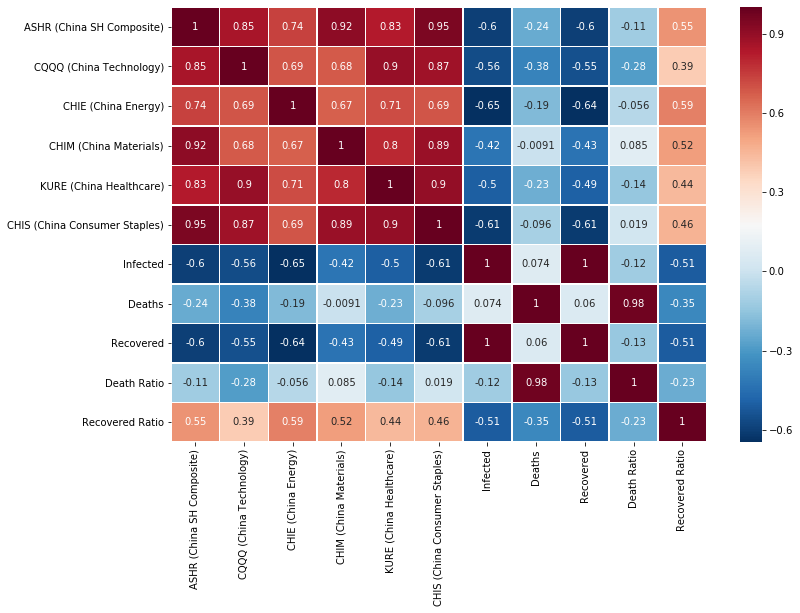

In [70]:
# China and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
china_correl = china_cv_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(china_correl, 
            xticklabels=china_correl.columns,
            yticklabels=china_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### US vs Coronavirus

In [71]:
usa_cv_raw_df = pd.concat([us_df, all_sum_china_cv], axis=1, sort=True)
usa_cv_raw_df.dropna(inplace=True)

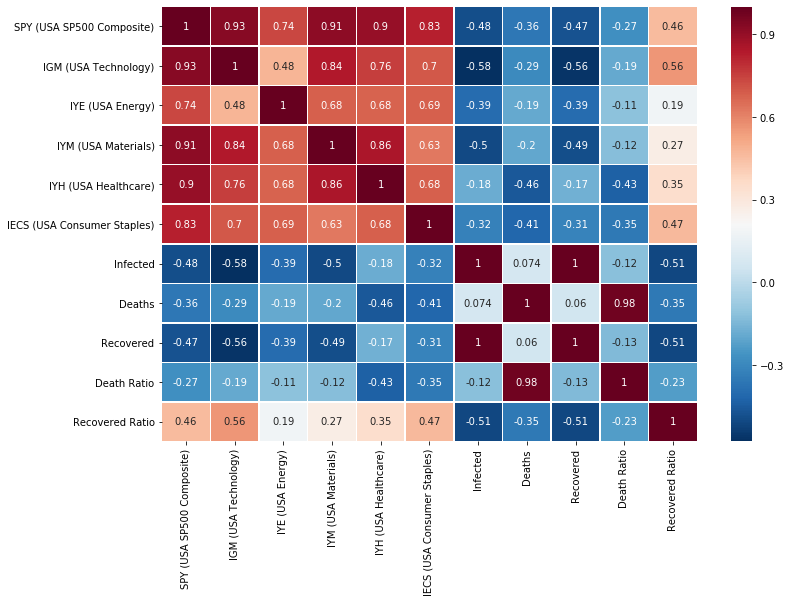

In [72]:
# USA and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
usa_correl = usa_cv_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(usa_correl, 
            xticklabels=usa_correl.columns,
            yticklabels=usa_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### China vs US

In [73]:
usa_china_raw_df = pd.concat([us_df, china_df], axis=1, sort=True)
usa_china_raw_df.dropna(inplace=True)

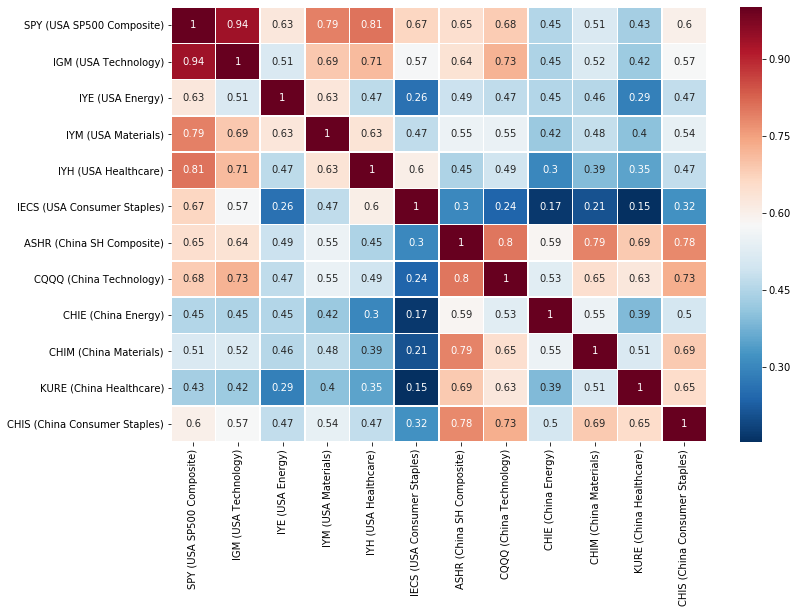

In [74]:
# China and the USA Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
usa_china_correl = usa_china_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(usa_china_correl, 
            xticklabels=usa_china_correl.columns,
            yticklabels=usa_china_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### China vs US vs Coronavirus

In [75]:
all_data_raw_df = pd.concat([us_df, china_df, all_sum_china_cv], axis=1, sort=True)
all_data_raw_df.dropna(inplace=True)

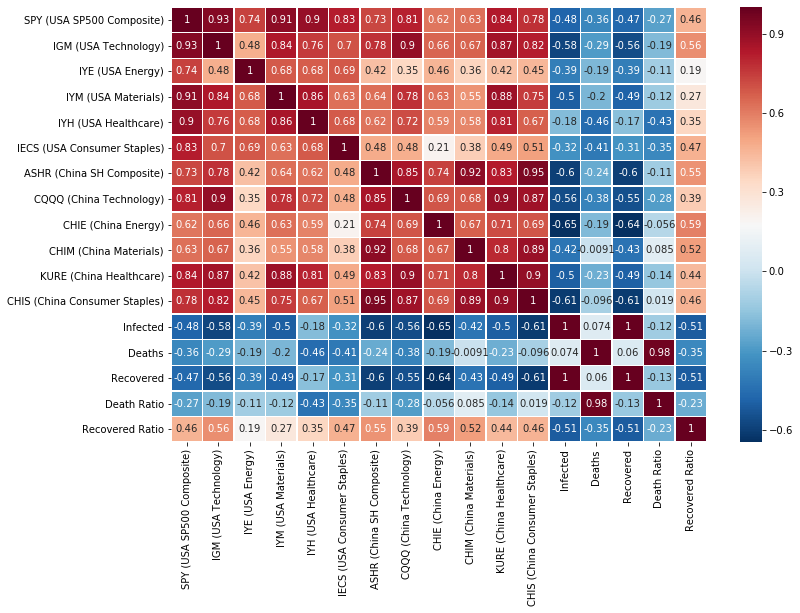

In [76]:
# China and USA and the Coronavirus Correlations
#help from: https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
#help from https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
all_data_correl = all_data_raw_df.pct_change().corr(method='pearson')
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sb.heatmap(all_data_correl, 
            xticklabels=all_data_correl.columns,
            yticklabels=all_data_correl.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# Percent Changes of Markets vs Coronavirus

In [77]:
df_all_data_pct_chg = all_data_raw_df.pct_change()*100

C:\Users\selva\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\selva\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2., 0., 1., 1., 0., 1., 2., 2., 2., 1.]),
 array([-1.8157959 , -1.48180362, -1.14781135, -0.81381907, -0.47982679,
        -0.14583452,  0.18815776,  0.52215004,  0.85614231,  1.19013459,
         1.52412687]),
 <a list of 10 Patch objects>)

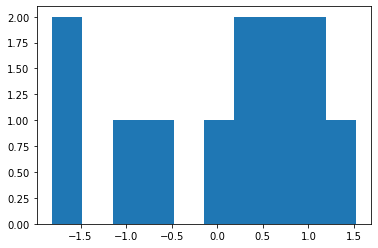

In [78]:
plt.hist(df_all_data_pct_chg['SPY (USA SP500 Composite)'])

(array([1., 0., 0., 4., 4., 1., 1., 0., 0., 1.]),
 array([-5.24109015, -4.13754905, -3.03400796, -1.93046686, -0.82692577,
         0.27661533,  1.38015642,  2.48369751,  3.58723861,  4.6907797 ,
         5.7943208 ]),
 <a list of 10 Patch objects>)

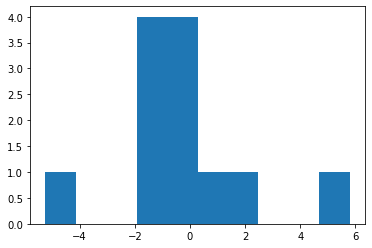

In [79]:
plt.hist(df_all_data_pct_chg['ASHR (China SH Composite)'])

(array([1., 0., 3., 5., 2., 0., 0., 0., 0., 1.]),
 array([-64.        , -42.24285714, -20.48571429,   1.27142857,
         23.02857143,  44.78571429,  66.54285714,  88.3       ,
        110.05714286, 131.81428571, 153.57142857]),
 <a list of 10 Patch objects>)

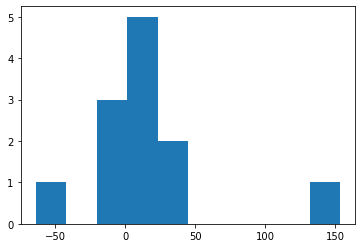

In [80]:
plt.hist(df_all_data_pct_chg['Recovered Ratio'])

In [81]:
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D

### Plot of China/US Composites Over Coronavirus Infection Rate

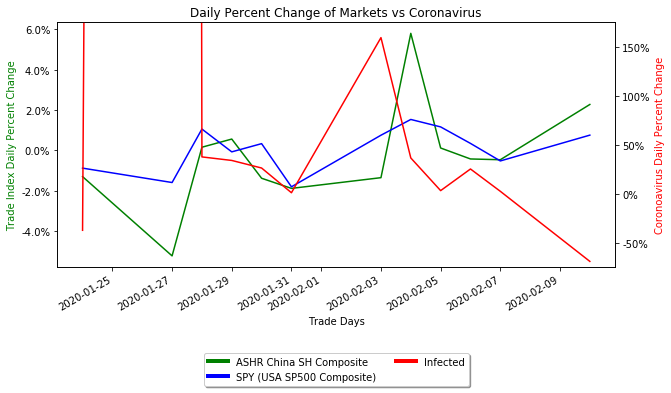

In [99]:
# Create a double y axis chart to show percentage changes of market versus coronovirus
# looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['ASHR (China SH Composite)']
y2 = df_all_data_pct_chg['SPY (USA SP500 Composite)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Daily Percent Change of Markets vs Coronavirus')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['ASHR China SH Composite', 'SPY (USA SP500 Composite)', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of China/US Composites Over Coronavirus Recovered Rate

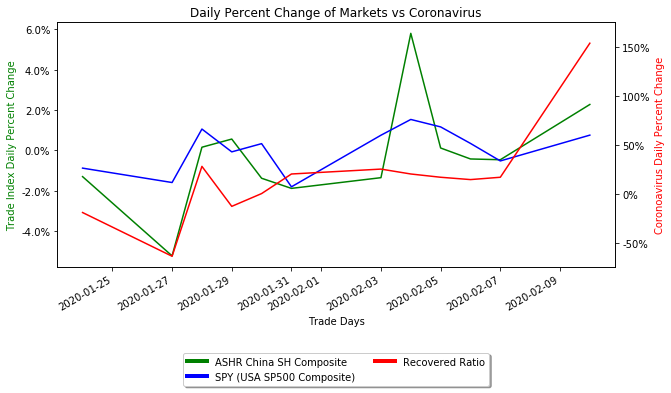

In [110]:
# Create a double y axis chart to show percentage changes of market versus coronovirus
# looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['ASHR (China SH Composite)']
y2 = df_all_data_pct_chg['SPY (USA SP500 Composite)']
y3 = df_all_data_pct_chg['Recovered Ratio']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Daily Percent Change of Markets vs Coronavirus')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['ASHR China SH Composite', 'SPY (USA SP500 Composite)', 'Recovered Ratio'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Energy Sectors Over Daily Infection Rate of Coronavirus

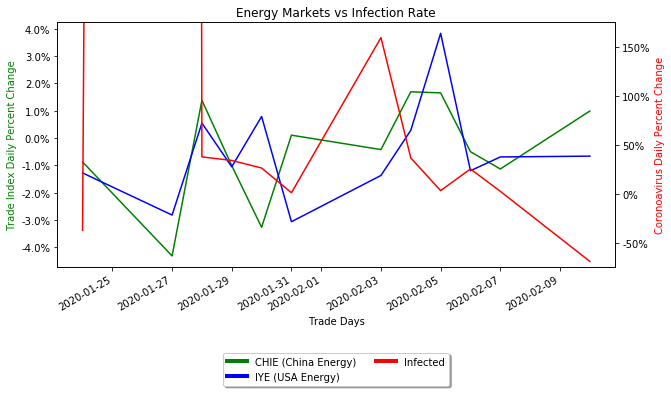

In [100]:
# Create a double y axis chart to show percentage changes of market versus coronovirus
# looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIE (China Energy)']
y2 = df_all_data_pct_chg['IYE (USA Energy)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Energy Markets vs Infection Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIE (China Energy)', 'IYE (USA Energy)', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Energy Sectors Over Daily Recovered Rate of Coronavirus

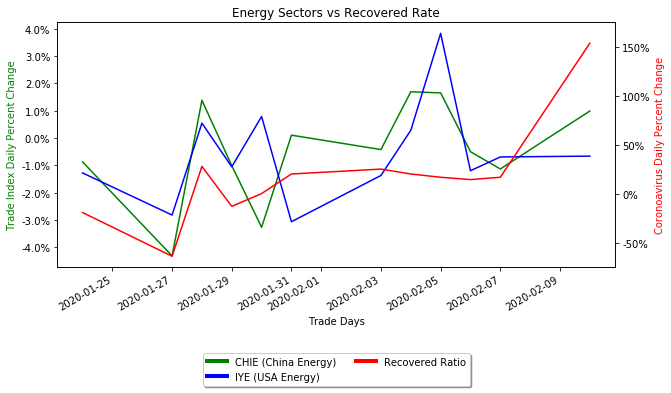

In [101]:
# Create a double y axis chart to show percentage changes of market versus coronovirus
# looked for help on: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib/14762601
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIE (China Energy)']
y2 = df_all_data_pct_chg['IYE (USA Energy)']
y3 = df_all_data_pct_chg['Recovered Ratio']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Energy Sectors vs Recovered Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIE (China Energy)', 'IYE (USA Energy)', 'Recovered Ratio'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Technology Markets Over Infection Rate of Coronavirus

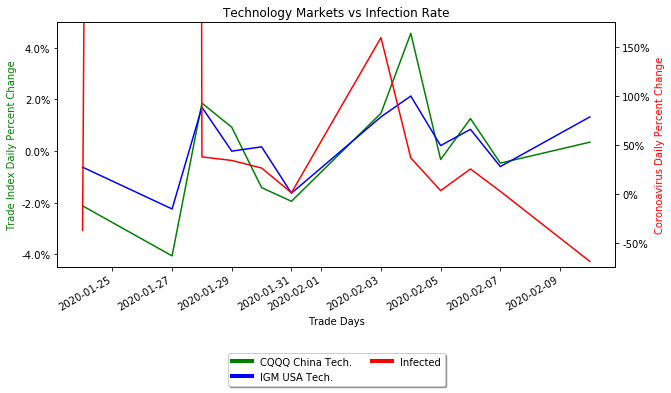

In [102]:
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CQQQ (China Technology)']
y2 = df_all_data_pct_chg['IGM (USA Technology)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Technology Markets vs Infection Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CQQQ China Tech.', 'IGM USA Tech.', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Technology Markets Over Recoverd Rate of Coronavirus

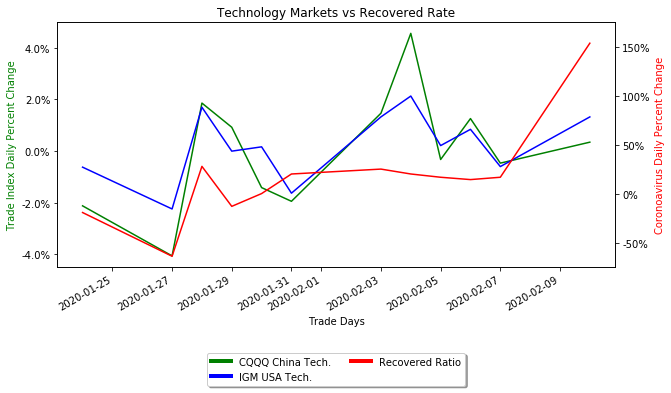

In [103]:
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CQQQ (China Technology)']
y2 = df_all_data_pct_chg['IGM (USA Technology)']
y3 = df_all_data_pct_chg['Recovered Ratio']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Technology Markets vs Recovered Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CQQQ China Tech.', 'IGM USA Tech.', 'Recovered Ratio'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Materials Markets Over Infection Rate of Coronavirus

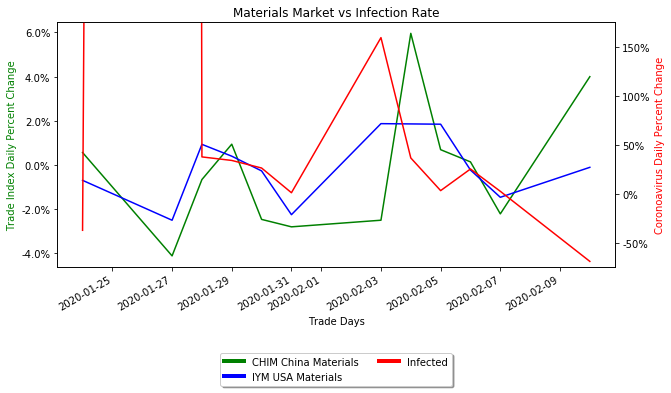

In [104]:
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIM (China Materials)']
y2 = df_all_data_pct_chg['IYM (USA Materials)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Materials Market vs Infection Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIM China Materials', 'IYM USA Materials', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Materials Markets Over Recovered Rate of Coronavirus

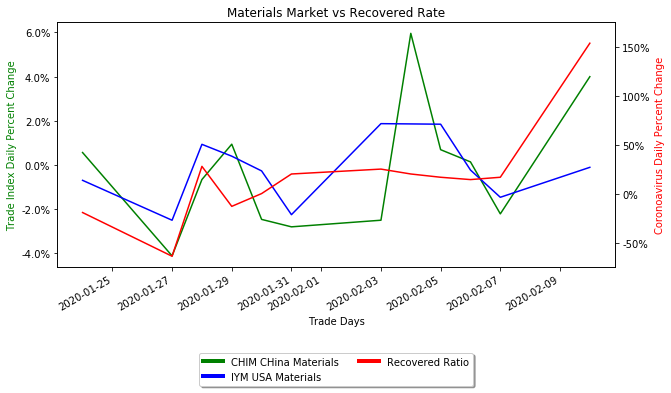

In [105]:
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIM (China Materials)']
y2 = df_all_data_pct_chg['IYM (USA Materials)']
y3 = df_all_data_pct_chg['Recovered Ratio']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Materials Market vs Recovered Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIM CHina Materials', 'IYM USA Materials', 'Recovered Ratio'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Healthcare Markets Over Infection Rate of Coronavirus

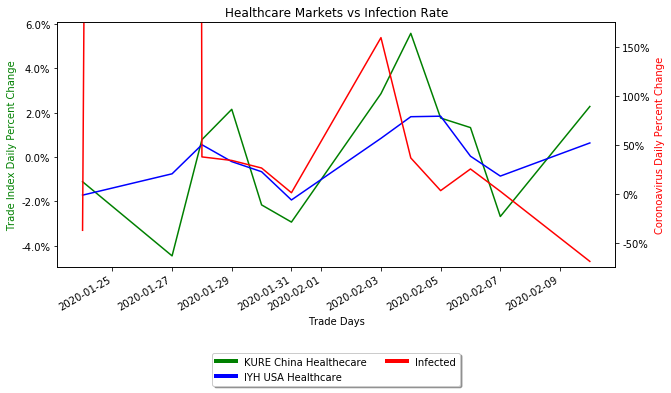

In [106]:
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['KURE (China Healthcare)']
y2 = df_all_data_pct_chg['IYH (USA Healthcare)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Healthcare Markets vs Infection Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['KURE China Healthecare', 'IYH USA Healthcare', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Healthcare Markets Over Recovered Rate of Coronavirus

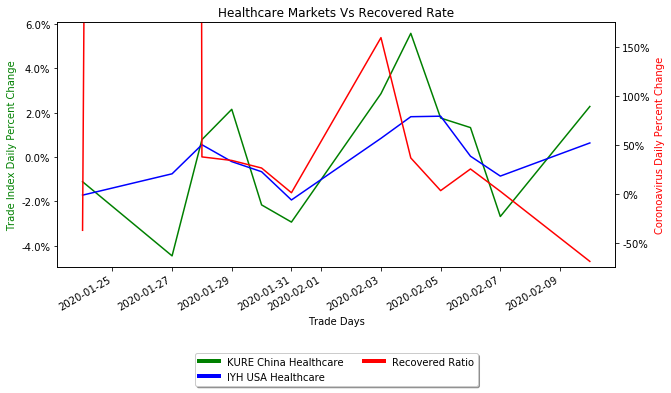

In [107]:
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['KURE (China Healthcare)']
y2 = df_all_data_pct_chg['IYH (USA Healthcare)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Healthcare Markets Vs Recovered Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['KURE China Healthcare', 'IYH USA Healthcare', 'Recovered Ratio'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Consumer Staples Markets Over Infection Rate of Coronavirus

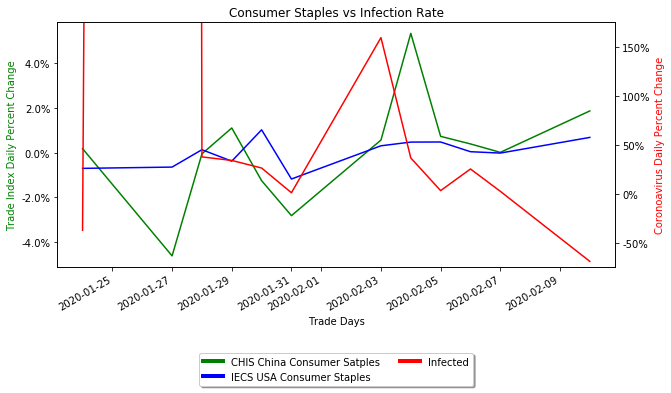

In [108]:
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIS (China Consumer Staples)']
y2 = df_all_data_pct_chg['IECS (USA Consumer Staples)']
y3 = df_all_data_pct_chg['Infected']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Consumer Staples vs Infection Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIS China Consumer Satples', 'IECS USA Consumer Staples', 'Infected'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

### Plot of Consumer Staples Markets Over Recovered Rate of Coronavirus

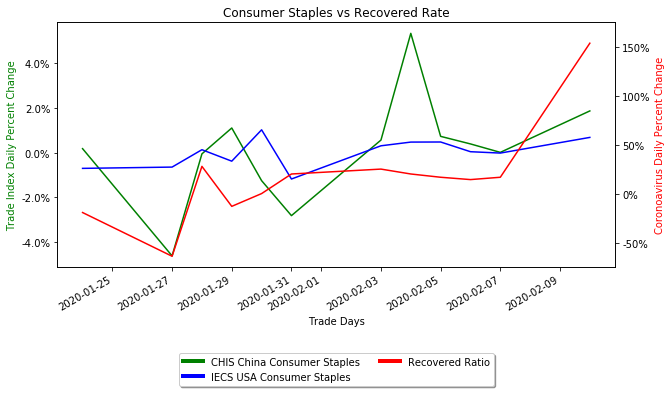

In [109]:
x = df_all_data_pct_chg.index
y1 = df_all_data_pct_chg['CHIS (China Consumer Staples)']
y2 = df_all_data_pct_chg['IECS (USA Consumer Staples)']
y3 = df_all_data_pct_chg['Recovered Ratio']

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-', y2, 'b-')
ax2.plot(x, y3, 'r-')
                   
ax1.set_title('Consumer Staples vs Recovered Rate')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Trade Index Daily Percent Change', color='g')
ax2.set_ylabel('Coronoavirus Daily Percent Change', color='r')

ax2.set_ylim(-75, 175)

fig.autofmt_xdate()

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['CHIS China Consumer Staples', 'IECS USA Consumer Staples', 'Recovered Ratio'], loc='upper center', bbox_to_anchor=(0.5, -.33),shadow=True, ncol=2)

plt.show()

# Betas: A Single Portfolio vs the Total Market 

In [93]:
all_stocks_raw_df = pd.concat([us_df, china_df], axis=1, sort=True)
all_stocks_raw_df.dropna(inplace=True)
pd.to_datetime(all_stocks_raw_df.index)
all_stocks_change_df = all_stocks_raw_df.pct_change()

### China's Sectors vs ASHR (China SH Composite)

In [94]:
# Calculate Beta for a single portfolio compared to the total market (ASHR (China SH Composite))
CHINA_tech_covariance = all_stocks_change_df['CQQQ (China Technology)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_variance = all_stocks_change_df['ASHR (China SH Composite)'].rolling(window=30).var()
CHINA_tech_beta = CHINA_tech_covariance / CHINA_variance
          
CHINA_energy_covariance = all_stocks_change_df['CHIE (China Energy)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_energy_beta = CHINA_energy_covariance / CHINA_variance

CHINA_materials_covariance = all_stocks_change_df['CHIM (China Materials)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_materials_beta = CHINA_materials_covariance / CHINA_variance

CHINA_health_covariance = all_stocks_change_df['KURE (China Healthcare)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_health_beta = CHINA_health_covariance / CHINA_variance

CHINA_staples_covariance = all_stocks_change_df['CHIS (China Consumer Staples)'].rolling(window=30).cov(all_stocks_change_df['ASHR (China SH Composite)'])
CHINA_staples_beta = CHINA_staples_covariance / CHINA_variance

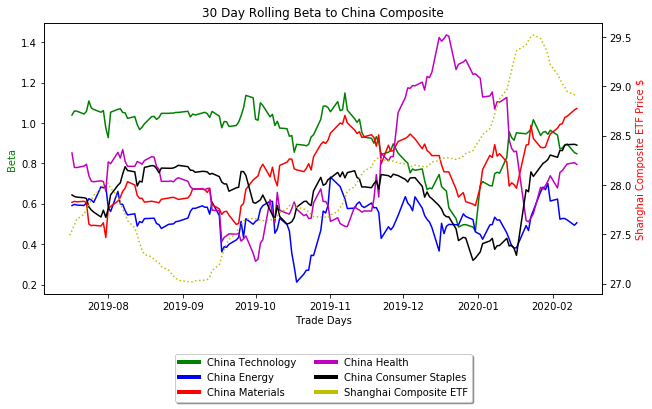

In [95]:
x = CHINA_tech_beta.index
y1 = CHINA_tech_beta
y2 = CHINA_energy_beta
y3 = CHINA_materials_beta
y4 = CHINA_health_beta
y5 = CHINA_staples_beta
y6 = all_stocks_raw_df['ASHR (China SH Composite)'].rolling(window=30).mean()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(x, y1, 'g-', y2, 'b-', y3, 'r-', y4, 'm-', y5, 'k-')
ax2 = ax1.twinx()                 
ax2.plot(x, y6, 'y:')

ax1.set_title('30 Day Rolling Beta to China Composite')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Beta', color='g')
ax2.set_ylabel('Shanghai Composite ETF Price $', color='r')


#fig.autofmt_xdate()

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='y', lw=4)]
ax1.legend(custom_lines, ['China Technology', 'China Energy', 'China Materials', 'China Health', 'China Consumer Staples', 'Shanghai Composite ETF'], loc='upper center', bbox_to_anchor=(0.5, -.2),shadow=True, ncol=2)

plt.show()

### US's Sectors vs S&P 500

In [96]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
USA_tech_covariance = all_stocks_change_df['IGM (USA Technology)'].rolling(window=30).cov(all_stocks_change_df['SPY (USA SP500 Composite)'])
USA_variance = all_stocks_change_df['SPY (USA SP500 Composite)'].rolling(window=30).var()
USA_tech_beta = USA_tech_covariance / USA_variance
          
USA_energy_covariance = all_stocks_change_df['IYE (USA Energy)'].rolling(window=30).cov(all_stocks_change_df['SPY (USA SP500 Composite)'])
USA_energy_beta = USA_energy_covariance / USA_variance

USA_materials_covariance = all_stocks_change_df['IYM (USA Materials)'].rolling(window=30).cov(all_stocks_change_df['SPY (USA SP500 Composite)'])
USA_materials_beta = USA_materials_covariance / USA_variance

USA_health_covariance = all_stocks_change_df['IYH (USA Healthcare)'].rolling(window=30).cov(all_stocks_change_df['SPY (USA SP500 Composite)'])
USA_health_beta = USA_health_covariance / USA_variance

USA_staples_covariance = all_stocks_change_df['IECS (USA Consumer Staples)'].rolling(window=30).cov(all_stocks_change_df['SPY (USA SP500 Composite)'])
USA_staples_beta = USA_staples_covariance / USA_variance

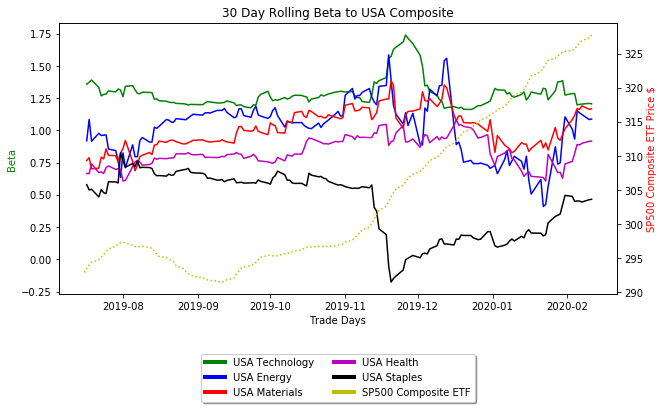

In [97]:
x = USA_tech_beta.index
y1 = USA_tech_beta
y2 = USA_energy_beta
y3 = USA_materials_beta
y4 = USA_health_beta
y5 = USA_staples_beta
y6 = all_stocks_raw_df['SPY (USA SP500 Composite)'].rolling(window=30).mean()

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(x, y1, 'g-', y2, 'b-', y3, 'r-', y4, 'm-', y5, 'k-')
ax2 = ax1.twinx()                 
ax2.plot(x, y6, 'y:')

ax1.set_title('30 Day Rolling Beta to USA Composite')
ax1.set_xlabel('Trade Days')
ax1.set_ylabel('Beta', color='g')
ax2.set_ylabel('SP500 Composite ETF Price $', color='r')


#fig.autofmt_xdate()

#looked up how to create custom legend: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
#looked up how to lock legend out of chart: https://pythonspot.com/matplotlib-legend/
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='y', lw=4)]
ax1.legend(custom_lines, ['USA Technology', 'USA Energy', 'USA Materials', 'USA Health', 'USA Staples', 'SP500 Composite ETF'], loc='upper center', bbox_to_anchor=(0.5, -.2),shadow=True, ncol=2)

plt.show()